# Eigenthings and Linear Transformation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set the default style of figures
plt.style.use('fivethirtyeight')

### Matrices as Linear Transformations

Some matrices will rotate our space, others will rescale it. When we 'apply a matrix to a vector', it means that we calculate the dot product of the matrix with the vector.

In [2]:
A = np.array([[-1, 3], [2, -2]])

In [3]:
A

array([[-1,  3],
       [ 2, -2]])

In [4]:
v = np.array([[2], [1]])

In [5]:
v

array([[2],
       [1]])

In [7]:
def plotVectors(vecs, colors, alpha=1, figsize=(10,8)):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    colors : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors
    figsize : tuple (x_size,y_size)
        Size of the figure

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure(figsize=figsize)
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)
    
    vecs = [vec.flatten() for vec in vecs]
    
    for i in range(len(vecs)):
        x = np.concatenate([[0, 0], vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy',
                   scale_units='xy',
                   scale=1,
                   color=colors[i],
                   alpha=alpha)

In [8]:
Av = A.dot(v)

In [10]:
Av

array([[1],
       [2]])

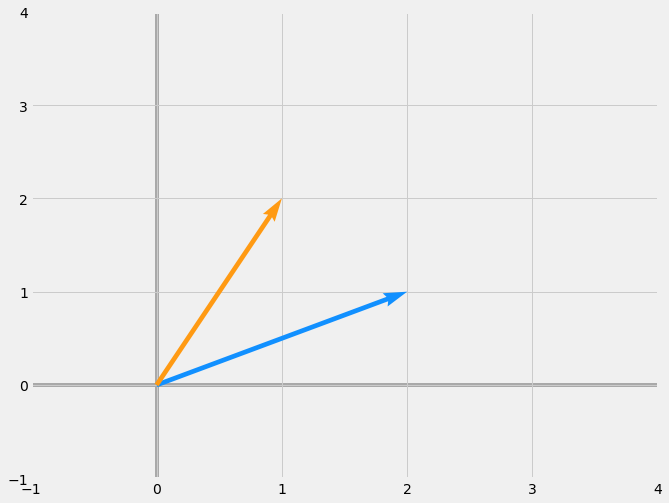

In [11]:
plotVectors([v, Av], colors=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()

### Eigenvectors

Imagine that 'the transformation' of the initial vector gave us a new vector with the same direction. The scale can be different but the direction is the same. When applying a matrix does not change the diretion of a vector, this special vector is called an eigenvector of the matrix.

In [12]:
A = np.array([[5, 1], [3, 3]])
A

array([[5, 1],
       [3, 3]])

In [14]:
v1 = np.array([[1], [1]])
v1

array([[1],
       [1]])

In [15]:
Av1 = A.dot(v1)

In [16]:
Av1

array([[6],
       [6]])

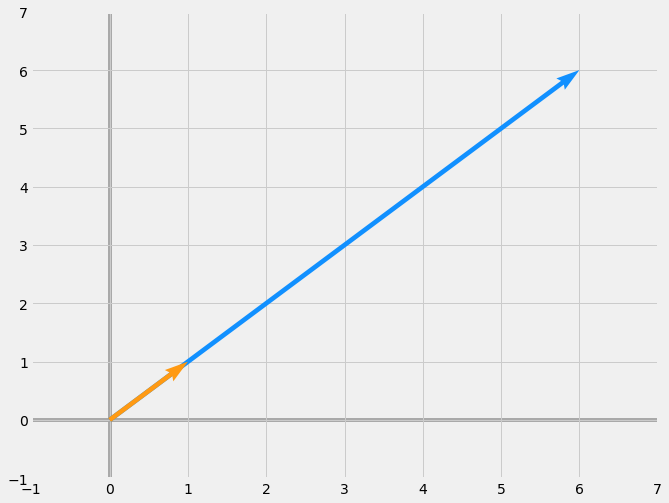

In [17]:
orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av1, v1], colors=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)
plt.show()

In [19]:
v2 = np.array([[1], [-3]])
v2

array([[ 1],
       [-3]])

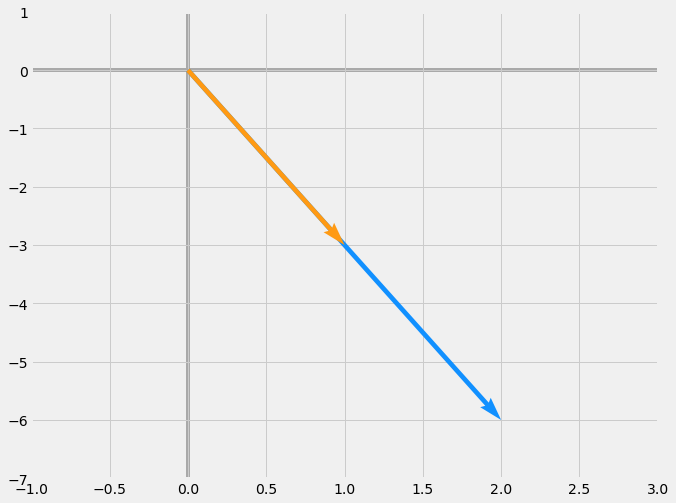

In [20]:
Av2 = A.dot(v2)

plotVectors([Av2, v2], colors=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)
plt.show()

### Finding Eigenvalues and Eigenvectors with `numpy`

In [22]:
eigenvals, V = np.linalg.eig(A)
eigenvals

array([6., 2.])

In [23]:
V

array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]])

The first array corresponds to the 'eigenvalues' and the second correspond to the 'eigenvectors' concatenated into columns. The first 'eigenvalue' corresponds to the first ''eigenvector'. Important to note that `np.linalg.eig()` does not return 'eigenvalues' ordered by magnitude.

### Reconstructing Matrix A with its Eigenvectors and Eigenvalues

Create a diagonal matrix from 'eigenvalues'.

In [24]:
lambdas = np.diag(eigenvals)
lambdas

array([[6., 0.],
       [0., 2.]])

Compute the inverse matrix of the 'eigenvector' matrix.

In [25]:
V_inv = np.linalg.inv(V)
V_inv

array([[ 1.06066017,  0.35355339],
       [-0.79056942,  0.79056942]])

Reconstruct the original matrix A.

In [26]:
A_orig  = V.dot(lambdas).dot(V_inv)
A_orig

array([[5., 1.],
       [3., 3.]])

In [27]:
A

array([[5, 1],
       [3, 3]])

We can see that both the original A and reconstructed A matrices are the same.